In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [15,8]

In [35]:
productos = pd.read_pickle('productos_limpia')
productos.shape

(41047, 12)

In [36]:
productos.head()

,PRODUCTO,CARGA,EXISTENCIA,DEVOLUCION,VENTA TOTAL,PRECIO * PRODUC,$,VENTA EN LT,RUTA,DIA,SEMANA,ANIO
0,PRODUCTO10,NaN,NaN,0,0.0,7.5,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017
1,Queso Hebra,NaN,NaN,0,0.0,60,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017
2,Queso fresco,NaN,0,0,0.0,12,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017
3,Queso añejo,NaN,0,0,0.0,55,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017
4,Queso panela,NaN,0,0,0.0,50,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017


In [37]:
# ¿Cuántas rutas de distribución diferentes identificaron cada año?
anios = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
for anio in anios:
    print(anio)
    rutas = []
    for ruta in productos.loc[productos['ANIO'] == anio]['RUTA']:
        if not ruta in rutas:
            rutas.append(ruta)
    print(rutas)

2012
[u'RUTA: FERMIN', u'RUTA: JESUS', u'RUTA: TRADICION', u'RUTA: JUGUERAS', u'RUTA: SAN MARCOS', 'RUTA: IVAN']
2013
[u'RUTA: FERMIN', u'RUTA: SAN MARCOS', u'RUTA: JUGUERAS', 'RUTA: IVAN', u'RUTA: TRADICION']
2014
[u'RUTA: SAN MARCOS', 'RUTA: IVAN', u'RUTA: JUGUERAS', u'RUTA: FERMIN']
2015
[u'RUTA: SAN MARCOS', u'RUTA: JUGUERAS', u'RUTA: FERMIN']
2016
[u'RUTA: SAN MARCOS', u'RUTA: JUGUERAS']
2017
[u'RUTA: SAN MARCOS', u'RUTA: JUGUERAS', u'RUTA: FERMIN', 'RUTA: MARTIN', u'RUTA: ERICK']
2018
[u'RUTA: SAN MARCOS', u'RUTA: FERMIN', 'RUTA: MARTIN', u'RUTA: JUGUERAS', u'RUTA: ERICK']


In [38]:
# ¿Qué días de la semana operan dichas rutas?
rutas = []
for ruta in productos['RUTA']:
    if not ruta in rutas:
        rutas.append(ruta)
for ruta in rutas:
    print(ruta)
    dias = []
    for dia in productos.loc[productos['RUTA'] == ruta]['DIA']:
        if not dia in dias and not pd.isnull(dia):
            dias.append(dia)
    print(dias)

RUTA: SAN MARCOS
['LUNES', 'MARTES', 'VIERNES', 'DOMINGO', 'MIERCOLES', 'JUEVES', 'SABADO']
RUTA: FERMIN
['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
RUTA: JESUS
['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES']
RUTA: TRADICION
['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
RUTA: JUGUERAS
['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
RUTA: IVAN
['MARTES', 'LUNES', 'JUEVES', 'VIERNES', 'MIERCOLES', 'SABADO']
RUTA: MARTIN
['SABADO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES']
RUTA: ERICK
['LUNES']


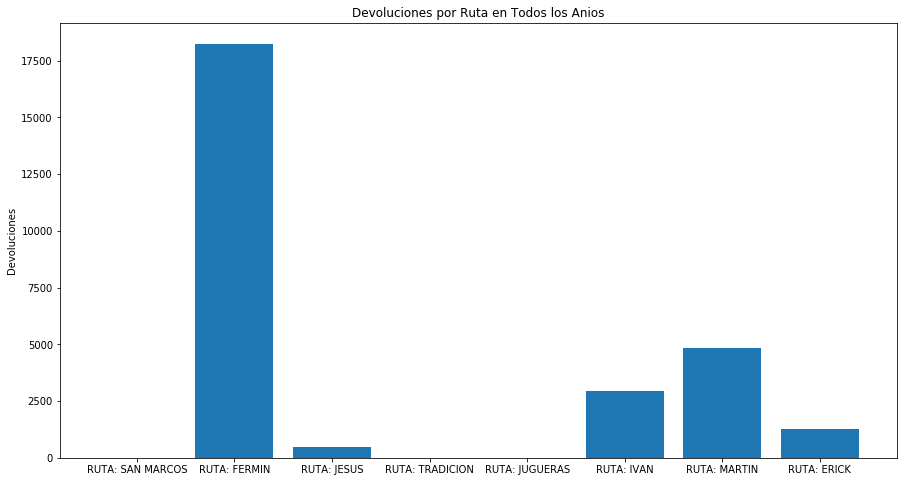

In [53]:
# ¿Qué rutas presentan el mayor número de devoluciones en los siete años?
rutas = []
for ruta in productos['RUTA']:
    if not ruta in rutas:
        rutas.append(ruta)
devoluciones = []
for ruta in rutas:
    devoluciones_count = pd.to_numeric(productos.loc[productos['RUTA'] == ruta]['DEVOLUCION'], errors = 'coerce').sum()
    devoluciones.append(devoluciones_count)

plt.bar(rutas, devoluciones)
plt.title('Devoluciones por Ruta en Todos los Anios')
plt.ylabel('Devoluciones')
plt.show()

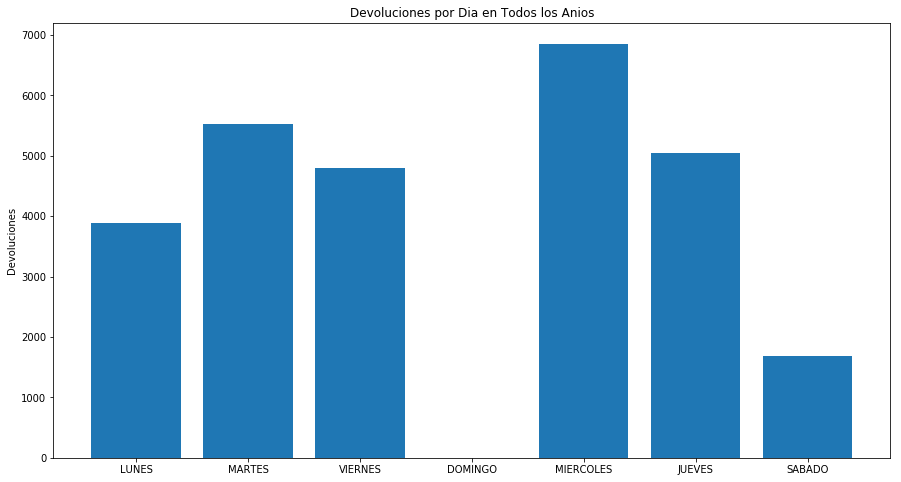

In [62]:
# ¿Con qué frecuencia ocurren estas devoluciones y en qué días?
dias = []
for dia in productos['DIA']:
    if not dia in dias:
        dias.append(dia)
devoluciones = []
for dia in dias:
    devoluciones_count = pd.to_numeric(productos.loc[productos['DIA'] == dia]['DEVOLUCION'], errors = 'coerce').sum()
    devoluciones.append(devoluciones_count)
plt.bar(dias, devoluciones)
plt.title('Devoluciones por Dia en Todos los Anios')
plt.ylabel('Devoluciones')
plt.show()

In [ ]:
# Semanas
semanas = []
for semana in productos['SEMANA']:
    if not semana in semanas:
        semanas.append(semana)
devoluciones = []
for semana in semanas:
    devoluciones_count = pd.to_numeric(productos.loc[productos['SEMANA'] == semana]['DEVOLUCION'], errors = 'coerce').sum()
    devoluciones.append(devoluciones_count)
plt.bar(dias, devoluciones)
plt.title('Devoluciones por Dia en Todos los Anios')
plt.ylabel('Devoluciones')
plt.show()